# Bank Credit Card Default Predictions using various classification algorithms


In finance, default is failure to meet the legal obligations (or conditions) of a loan, for example when a home buyer fails to make a mortgage payment, or when a corporation or government fails to pay a bond which has reached maturity.
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

The dataset is available for download at : https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients.
The analysis is done in Python and different machine learning algorithms are considered and accuracy metrics evaluated. The classification goal is to predict if the client will default or not.

## Attribute information

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female)

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

X4: Marital status (0= unknown,1 = married; 2 = single; 3 = others)

X5: Age (year)

X6 - X11: History of past payment, as per the past monthly payment records (from April to September, 2005)
X6 = the repayment status in September, 2005;
X7 = the repayment status in August, 2005; . . .;
X11 = the repayment status in April, 2005. 
The measurement scale for the repayment status is: -2: No consumption; 0: The use of revolving credit; -1 = paid in full; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar);
X12 = amount of bill statement in September, 2005;
X13 = amount of bill statement in August, 2005; . . .;
X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar);
X18 = amount paid in September, 2005; 
X19 = amount paid in August, 2005; . . .;
X23 = amount paid in April, 2005. 

Lets begin by importing the libraries

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline 

Now read in and preview the dataset.

In [2]:
#Importing the dataset
dataset = pd.read_excel("default_of_credit_card_clients.xls")

In [3]:
dataset.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, ID to 30000
Data columns (total 24 columns):
X1     30001 non-null object
X2     30001 non-null object
X3     30001 non-null object
X4     30001 non-null object
X5     30001 non-null object
X6     30001 non-null object
X7     30001 non-null object
X8     30001 non-null object
X9     30001 non-null object
X10    30001 non-null object
X11    30001 non-null object
X12    30001 non-null object
X13    30001 non-null object
X14    30001 non-null object
X15    30001 non-null object
X16    30001 non-null object
X17    30001 non-null object
X18    30001 non-null object
X19    30001 non-null object
X20    30001 non-null object
X21    30001 non-null object
X22    30001 non-null object
X23    30001 non-null object
Y      30001 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


There are no NA's and the dataset is in usable format. Lets rename the columns. 

In [5]:
dataset.columns = dataset.iloc[0,:]
dataset=dataset.iloc[1:,:]
dataset.head(10)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null object
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGE                      30000 non-null object
AGE                           30000 non-null object
PAY_0                         30000 non-null object
PAY_2                         30000 non-null object
PAY_3                         30000 non-null object
PAY_4                         30000 non-null object
PAY_5                         30000 non-null object
PAY_6                         30000 non-null object
BILL_AMT1                     30000 non-null object
BILL_AMT2                     30000 non-null object
BILL_AMT3                     30000 non-null object
BILL_AMT4                     30000 non-null object
BILL_AMT5                     30000 non-null object
BILL_AMT6                     30000 non-null object
PAY_AMT1    

Lets rename the target variable as default and also set the palette for the seaborn library for generating plots

In [7]:
default = "default payment next month"

In [8]:
sns.set_palette("hls",2)

## Feature Analysis

### Target variable

Lets start off with the target variable , default

[[<matplotlib.text.Text at 0x11e4703c8>,

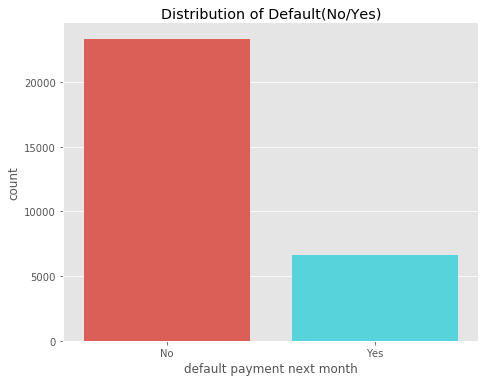

In [9]:
sns.FacetGrid(dataset, hue=default,size=5,aspect = 1.3)
sns.countplot(x=default, data=dataset,saturation=1).set(title="Distribution of Default(No/Yes)",xticklabels=['No','Yes'])

In [10]:
print("Percentage of Defaults : ",(np.sum([dataset[default]==1])/len(dataset[default]))*100)
print("Percentage of Non-Defaults : ",(np.sum([dataset[default]==0])/len(dataset[default]))*100)

Percentage of Defaults :  22.12
Percentage of Non-Defaults :  77.88


The above calculation tells us that out of the 30,000 clients, 78% have not defaulted, where as 22% did as illustrated in the `countplot()`. The dataset can't be called as 'skewed' as this proprtion is observed in most practical scenarios.

### `SEX`, `EDUCATION`, `MARRIAGE`  Variables

[[<matplotlib.text.Text at 0x11c74b198>,

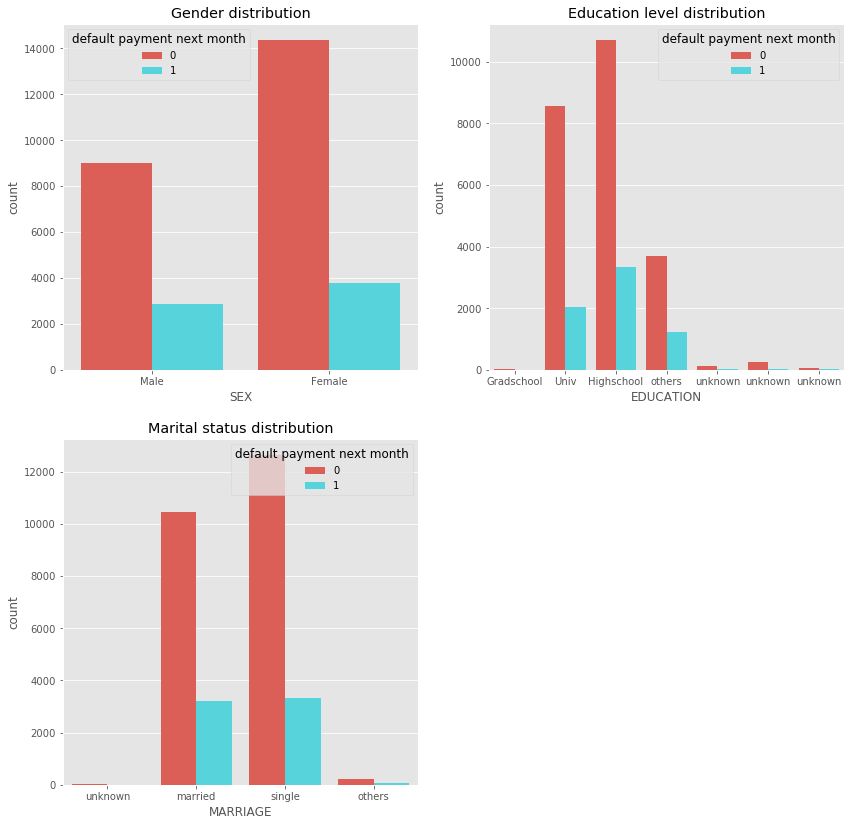

In [11]:
# Create a figure instance, and the subplots
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

sns.set_palette("hls",2)
sns.countplot(x="SEX", hue=default, 
              data=dataset,ax=ax1,saturation=1).set(title='Gender distribution',xticklabels=['Male','Female'])
sns.countplot(x="EDUCATION", 
              hue=default,
              data=dataset,ax=ax2,saturation=1).set(title='Education level distribution',
                                                    xticklabels=['Gradschool','Univ','Highschool','others','unknown','unknown','unknown'])
sns.countplot(x="MARRIAGE",
              hue=default, 
              data=dataset,ax=ax3,saturation=1).set(title='Marital status distribution',
                                                    xticklabels=['unknown','married','single','others'])

From `SEX` variable, approx. 1/3 rd of males defaulted and the same ratio is observed for females too. In `EDUCATION` variable, the relevant hits are for the `university` and `high School` classes, with almost similar ratio of defaults. The `MARRIAGE` variable gives out similar proportions for `married` and `single` classes. This implies that these variables may not function as good predictors for the classification problem, as the amount of variablility in data is limited.

### `AGE` and `LIMIT_BAL` variables

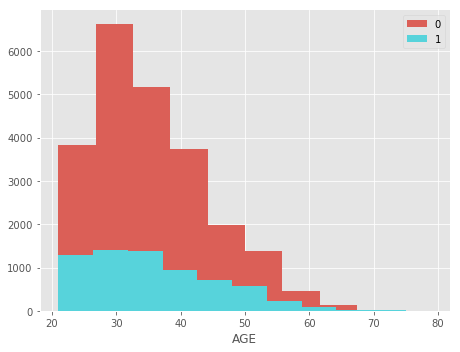

In [12]:
g = sns.FacetGrid(dataset, hue=default, size=5, aspect = 1.3)
g.map(plt.hist, "AGE")
plt.legend()

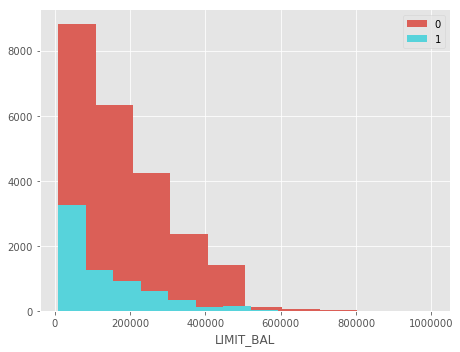

In [13]:
g = sns.FacetGrid(dataset, hue=default, size=5, aspect = 1.3)
g.map(plt.hist, "LIMIT_BAL")
plt.legend()

The same (1/3rd) ratio of defaults is observed in the `AGE` variable and so with the `LIMIT_BAL` variable. Also , a scatterplot of the two reveals strong positive correlations as below :

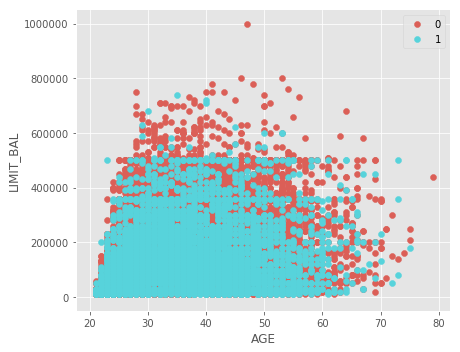

In [14]:
g = sns.FacetGrid(dataset, hue=default, size=5, aspect = 1.3)
g.map(plt.scatter,"AGE" ,"LIMIT_BAL")
plt.legend()

The above implies that the amount of balance limit setting is decided by the bank based on `AGE`

### `Repayment Status` variable

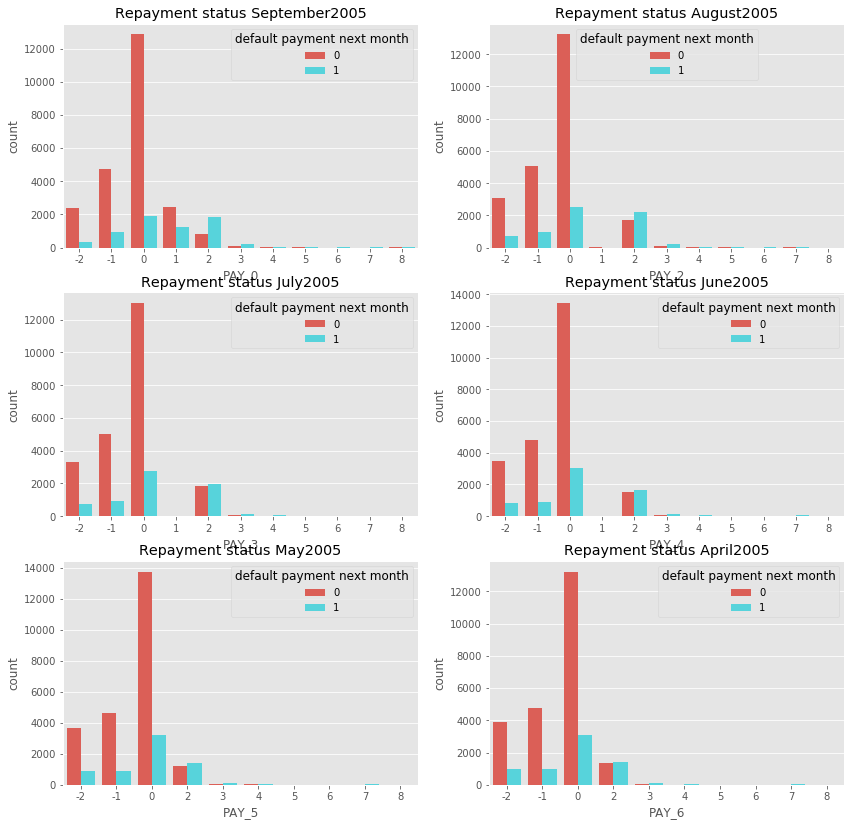

In [15]:
# Create a figure instance, and the subplots
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.set_palette("hls",2)
sns.countplot(x="PAY_0", hue=default, data=dataset,ax=ax1,saturation=1).set_title('Repayment status September2005')
sns.countplot(x="PAY_2", hue=default, data=dataset,ax=ax2,saturation=1).set_title('Repayment status August2005')
sns.countplot(x="PAY_3", hue=default, data=dataset,ax=ax3,saturation=1).set_title('Repayment status July2005')
sns.countplot(x="PAY_4", hue=default, data=dataset,ax=ax4,saturation=1).set_title('Repayment status June2005')
sns.countplot(x="PAY_5", hue=default, data=dataset,ax=ax5,saturation=1).set_title('Repayment status May2005')
sns.countplot(x="PAY_6", hue=default, data=dataset,ax=ax6,saturation=1).set_title('Repayment status April2005')

From above, observed that the majority of clients have revolving credits that does not have a fixed number of payments (belong to class 0) and they do have the least proprtion of defaults. A closer look at the above histograms reveal that those who have payment delay for two months (class 2) have a higher ratio of defaults, as a payment delay may be a good indicator of default too.

### `Amount of bill statement` variables

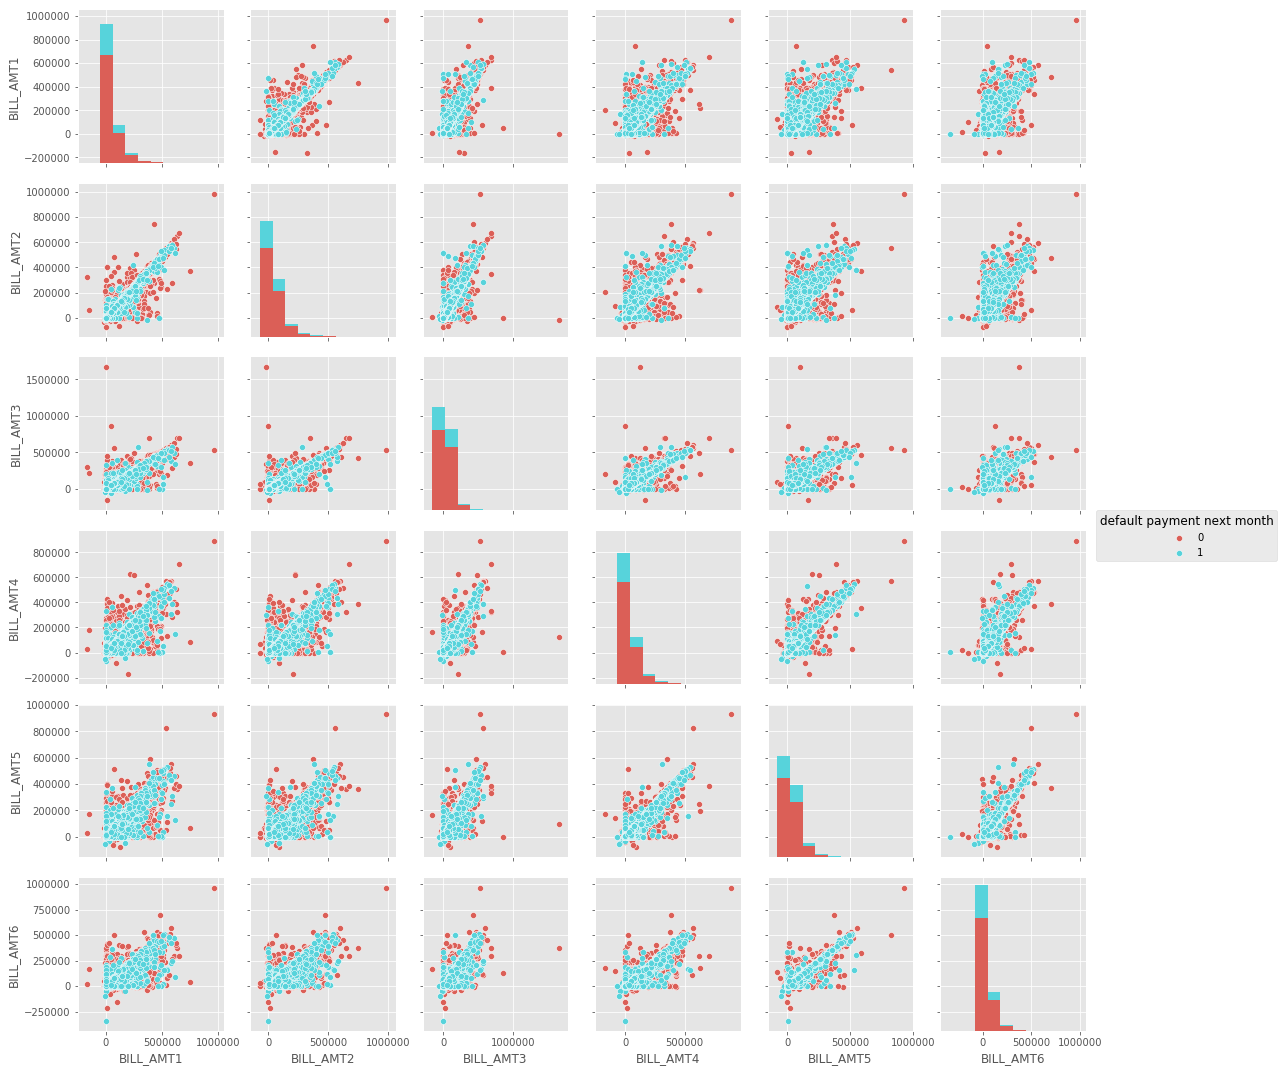

In [16]:
sns.pairplot(dataset, hue='default payment next month',vars =['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],palette="hls")

From above the variables `BILL_AMT2` ,`BILL_AMT3`,`BILL_AMT5` have similar distributions where as `BILL_AMT1` and `BILL_AMT6` are similar. Also they are highly positively correlated as is  quite intutive.

### `Amount of previous payment` variable

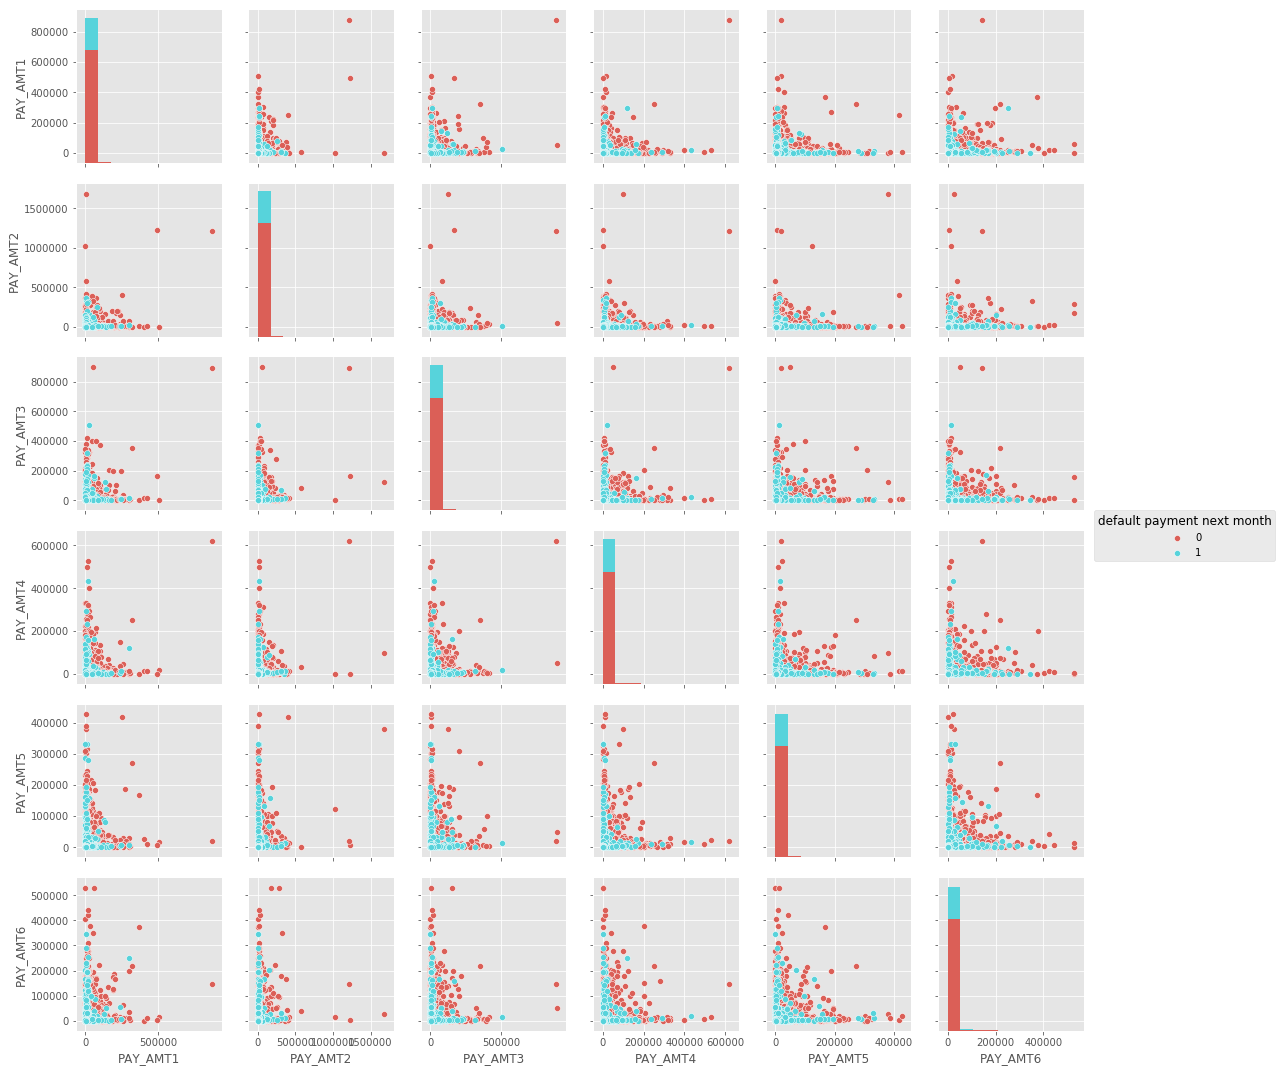

In [17]:
sns.pairplot(dataset, hue='default payment next month',vars =['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],palette="hls")

The above variables seem to be negatively correlated and with slighlty nonlinear variations. Intuitively, Amount of previous payment can affect the defaults.

## Data Pre-processing

### Encoding Categorical Data

Lets encode the categorical variables 

In [18]:
# Encoding categorical data
dataset = pd.get_dummies(dataset, columns=["EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3",
                                           "PAY_4", "PAY_5","PAY_6"])

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 91 columns):
LIMIT_BAL                     30000 non-null object
SEX                           30000 non-null object
AGE                           30000 non-null object
BILL_AMT1                     30000 non-null object
BILL_AMT2                     30000 non-null object
BILL_AMT3                     30000 non-null object
BILL_AMT4                     30000 non-null object
BILL_AMT5                     30000 non-null object
BILL_AMT6                     30000 non-null object
PAY_AMT1                      30000 non-null object
PAY_AMT2                      30000 non-null object
PAY_AMT3                      30000 non-null object
PAY_AMT4                      30000 non-null object
PAY_AMT5                      30000 non-null object
PAY_AMT6                      30000 non-null object
default payment next month    30000 non-null object
EDUCATION_0                   30000 non-null uint8
EDUCATION_1  

Lets generate the features, X and the target, y. The dataset now has a total of 91 features. To help prevent `dummy variable trap`, lets drop one redundant class each, from all the categorical features.

In [20]:
X = dataset.drop([default,'EDUCATION_0','MARRIAGE_0',
                 'PAY_0_8','PAY_2_8','PAY_3_8','PAY_4_8','PAY_5_8','PAY_6_8'], axis = 1)
y = dataset[default]

To adjust for datatype correction

In [21]:
y = [1 if x else 0 for x in y]

### Feature Scaling

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting into training and test set

Lets do the split in the ratio 80:20

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Dimensionality Reduction : Principal Component Analysis 

After encoding the categorical variables, we now have a total of 91 input features and it would be cumbersome to include all of them in the model. So lets resort to Dimensionality Reduction using Kernel PCA and extract most important cmponents.

In [24]:
# Applying PCA to reduce the number of features
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [25]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([ 0.11587083,  0.060432  ,  0.05564632,  0.05127399,  0.04373623])

As above, the five principal components can explain 11.5%, 6.0 %, 5.5 %, 5.1%, 4.3%  of the variations respectively. Now move on to Machine Learning

## Machine Learning : Model Building

We will build three classifiers as below and evaluate the prediction accuracies. The metric `accuracy_score` is imported

In [26]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [27]:
# Fit a Logistic Regression for classification
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, y_train)
# Evaluating accuracy on test set
accuracy1 = classifier1.score(X_test,y_test)
print("Logistic Regression classifier accuracy :",accuracy1*100)

Logistic Regression classifier accuracy : 80.4833333333


### MultiLayer Perceptron 

In [28]:
# Fit a MultiLayer Perceptron for classification
from sklearn.neural_network import MLPClassifier
classifier2 = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5,2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=False,
       warm_start=False)

classifier2.fit(X_train,y_train)
accuracy2 = classifier4.score(X_test,y_test)
print("MultiLayer Perceptron classifier accuracy :",accuracy2*100)

MultiLayer Perceptron classifier accuracy : 80.8


### Linear SVM

In [29]:
# Fitting Linear SVM to the Training set
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, y_train)

# Evaluating accuracy on test set
accuracy3 = classifier3.score(X_test,y_test)
print("Support Vector classifier accuracy :",accuracy3*100)

Support Vector classifier accuracy : 80.6166666667


## Concluding Remarks

1. The bank's data for predicting default has been analysed. To reduce the number of features, Principal Component Analysis has been used and first components could explain the variance in the data by 11%.
2.  Logistic Regression gives a prediction accuracy of 80.4% on the test set where as that of MultiLayer Perceptron classifier is 80.8%, Support Vector classifier could fetch as much as 80.6%.
3. Inclusion of more relevant features can further enhance the insights. Determining the relevant features is not possible beacause of too many categorical features.